In [97]:
import numpy as np
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt




In [121]:
n_features = 3
n_samples = 50


input, output = make_classification(n_samples = n_samples, n_features = n_features, n_informative = 3,
n_redundant = 0, n_classes = 2,
random_state = 0)


(50,)

In [99]:
def sigmoid(x, deriv=False):
    if deriv == True:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [224]:
class NN_Model:
    def __init__(self, input, output, /, bias = 0):
        self.weights = np.random.random_sample(size = (input.shape[1], 50)) 
        self.input = input
        self.output = output#.reshape(output.shape[0], 1)

        self.bias = bias

    def feedforward(self):
        self.hidden = sigmoid(np.dot(self.input, self.weights) + self.bias) 


    def backpropagation(self):
        error = self.output - self.hidden
        delta = error * sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.input.T, delta)

        return error
    
    def train(self, epochs = 100):
        self.error_history = []
        for i in range(epochs):
            self.feedforward()
            error = self.backpropagation()
            self.error_history.append(np.average(np.abs(error)))

    def predict(self, data):
        return sigmoid(np.dot(data, self.weights))

In [227]:

Model = NN_Model(input, output, bias = 0.1)
Model.train(epochs = 100)


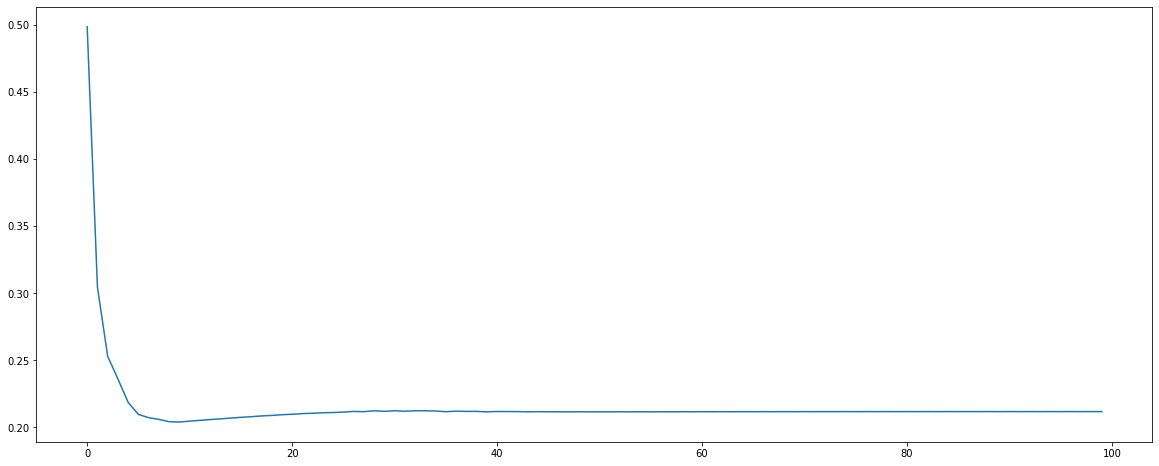

In [228]:
epochs = list(range(len(Model.error_history)))
plt.figure(figsize = (20, 8))
plt.plot(epochs, Model.error_history)
plt.show()

In [231]:
test = np.array([[1, 0, 1]])
result = Model.predict(test)
result[0:,[49]]

array([[0.76016947]])